In [68]:

import statsmodels as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default="plotly_white"
import plotly.express as px


In [69]:
df=pd.read_csv("Apple-Fitness-Data.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               149 non-null    object 
 1   Time                               149 non-null    object 
 2   Step Count                         149 non-null    int64  
 3   Distance                           149 non-null    float64
 4   Energy Burned                      149 non-null    float64
 5   Flights Climbed                    149 non-null    int64  
 6   Walking Double Support Percentage  149 non-null    float64
 7   Walking Speed                      149 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 9.4+ KB


In [71]:
df.head()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,2023-03-21,16:01:23,46,0.02543,14.620,3,0.304,3.060
1,2023-03-21,16:18:37,645,0.40041,14.722,3,0.309,3.852
2,2023-03-21,16:31:38,14,0.00996,14.603,4,0.278,3.996
3,2023-03-21,16:45:37,13,0.00901,14.811,3,0.278,5.040
4,2023-03-21,17:10:30,17,0.00904,15.153,3,0.281,5.184


In [72]:
df.isnull()

,Date,Time,Step Count,Distance,Energy Burned,Flights Climbed,Walking Double Support Percentage,Walking Speed
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
144,False,False,False,False,False,False,False,False
145,False,False,False,False,False,False,False,False
146,False,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False,False


In [73]:
df.isnull().sum()

Date                                 0
Time                                 0
Step Count                           0
Distance                             0
Energy Burned                        0
Flights Climbed                      0
Walking Double Support Percentage    0
Walking Speed                        0
dtype: int64

In [74]:
#step count overtime

fig=px.line(df,x="Time",y="Step Count",title="Step count over time")
fig.show()

In [75]:
# distance covered over time

fig=px.bar(df,x="Time",y="Distance",title="distance covered over time")
fig.show()

In [76]:
#energy burned over time

fig=px.line(df,x='Time',y='Energy Burned',title="Energy Burned Over Time")
fig.show()

In [77]:
fig=px.bar(df,x="Time",y="Walking Speed",title="Walking speed over time")
fig.show()

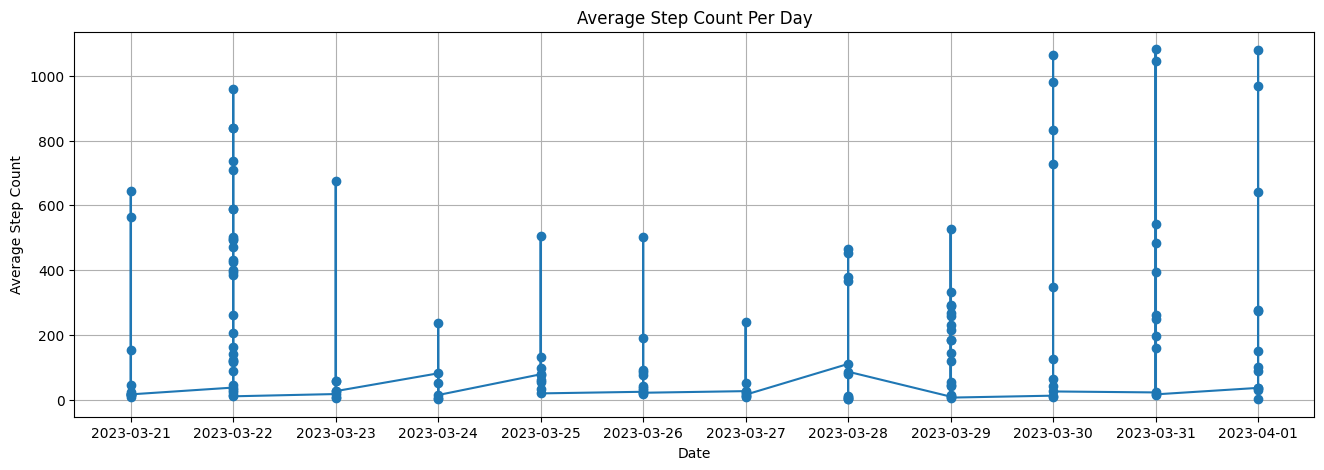

In [78]:
#average step count per day
plt.figure(figsize=(16, 5))
plt.plot(df["Date"], df["Step Count"], marker='o')
plt.title("Average Step Count Per Day")
plt.xlabel("Date")
plt.ylabel("Average Step Count")
plt.grid(True)
plt.show()

In [79]:
#calculate walking efficiency

df["Walking Efficiency"]=df["Distance"]/df["Step Count"]

fig=px.line(df,x="Time",y="Walking Efficiency",title="Walking efficiency over time")
fig.show()

In [80]:
#Step Count and Walking Speed Variations by Time Interval
time_intervals = pd.cut(pd.to_datetime(df["Time"]).dt.hour,
                        bins=[0, 12, 18, 24],
                        labels=["Morning", "Afternoon", "Evening"], 
                        right=False)

df["Time Interval"] = time_intervals

# Variations in Step Count and Walking Speed by Time Interval
fig7 = px.scatter(df, x="Step Count",
                  y="Walking Speed",
                  color="Time Interval",
                  title="Step Count and Walking Speed Variations by Time Interval",
                  trendline='ols')
fig7.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12572\3417730579.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [81]:
print(df.dtypes)


Date                                   object
Time                                   object
Step Count                              int64
Distance                              float64
Energy Burned                         float64
Flights Climbed                         int64
Walking Double Support Percentage     float64
Walking Speed                         float64
Walking Efficiency                    float64
Time Interval                        category
dtype: object


In [ ]:
# compare the daily average of all the health and fitness metrics:

# Convert relevant columns to numeric
columns_to_convert = ["Step Count", "Distance", "Energy Burned", "Flights Climbed", "Walking Double Support Percentage", "Walking Speed"]
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Group by Date and calculate mean
daily_avg_metrics = df.groupby("Date").mean().reset_index()

# Melt the DataFrame
daily_avg_metrics_melted = daily_avg_metrics.melt(
    id_vars=["Date"], 
    value_vars=columns_to_convert
)

# Treemap of Daily Averages for Different Metrics Over Several Weeks
fig = px.treemap(daily_avg_metrics_melted,
                 path=["variable"],
                 values="value",
                 color="variable",
                 hover_data={"value": True},
                 title="Daily Averages for Different Metrics")
fig.show()



In [ ]:
columns_to_convert = ["Distance", "Energy Burned", "Flights Climbed", "Walking Double Support Percentage", "Walking Speed"]
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Group by Date and calculate mean
daily_avg_metrics = df.groupby("Date").mean().reset_index()

# Melt the DataFrame
daily_avg_metrics_melted = daily_avg_metrics.melt(
    id_vars=["Date"], 
    value_vars=columns_to_convert
)

# Treemap of Daily Averages for Different Metrics Over Several Weeks
fig = px.treemap(daily_avg_metrics_melted,
                 path=["variable"],
                 values="value",
                 color="variable",
                 hover_data={"value": True},
                 title="Daily Averages for Different Metrics(Excluding step count)")
fig.show()


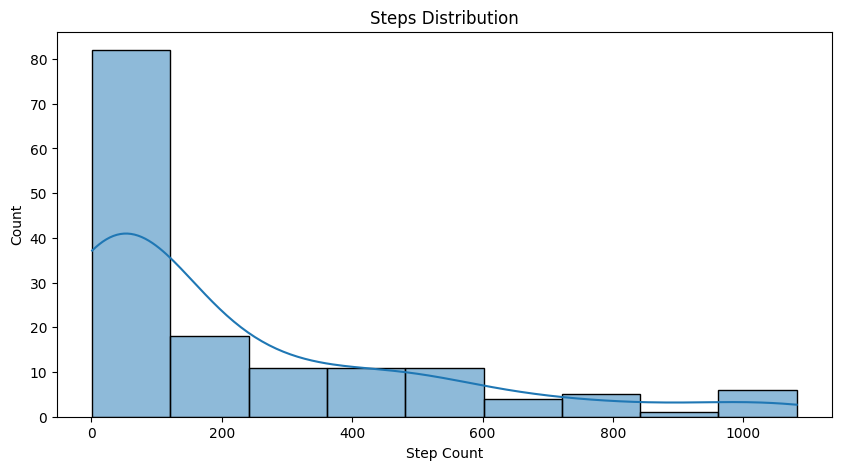

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Steps distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Step Count'], kde=True)
plt.title('Steps Distribution')
plt.show()




In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df=pd.read_csv("Apple-Fitness-Data.csv")

# Feature and target selection
X = df[['Step Count', 'Distance', 'Energy Burned', 'Flights Climbed', 'Walking Double Support Percentage', 'Walking Speed']]
y = df['Step Count'].shift(-1).dropna()
X = X[:-1]  # Align with y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Model prediction
predictions = model.predict(X_test)
print(predictions)

[145.22395047 161.40830525 175.21772662 311.89617721 275.29780705
 109.58834724 219.37596855 364.32844014 171.95690779 141.38066431
 187.43050171 150.95423806 193.73398544 323.71430305 210.78008852
 119.52266103 171.84683433 120.90952542 139.85163014 297.6183318
 295.76048938 165.46971894 265.73292283 492.78925923 147.59830673
 447.16974852 158.95938692 198.70178625 170.10309095 152.96482623]


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



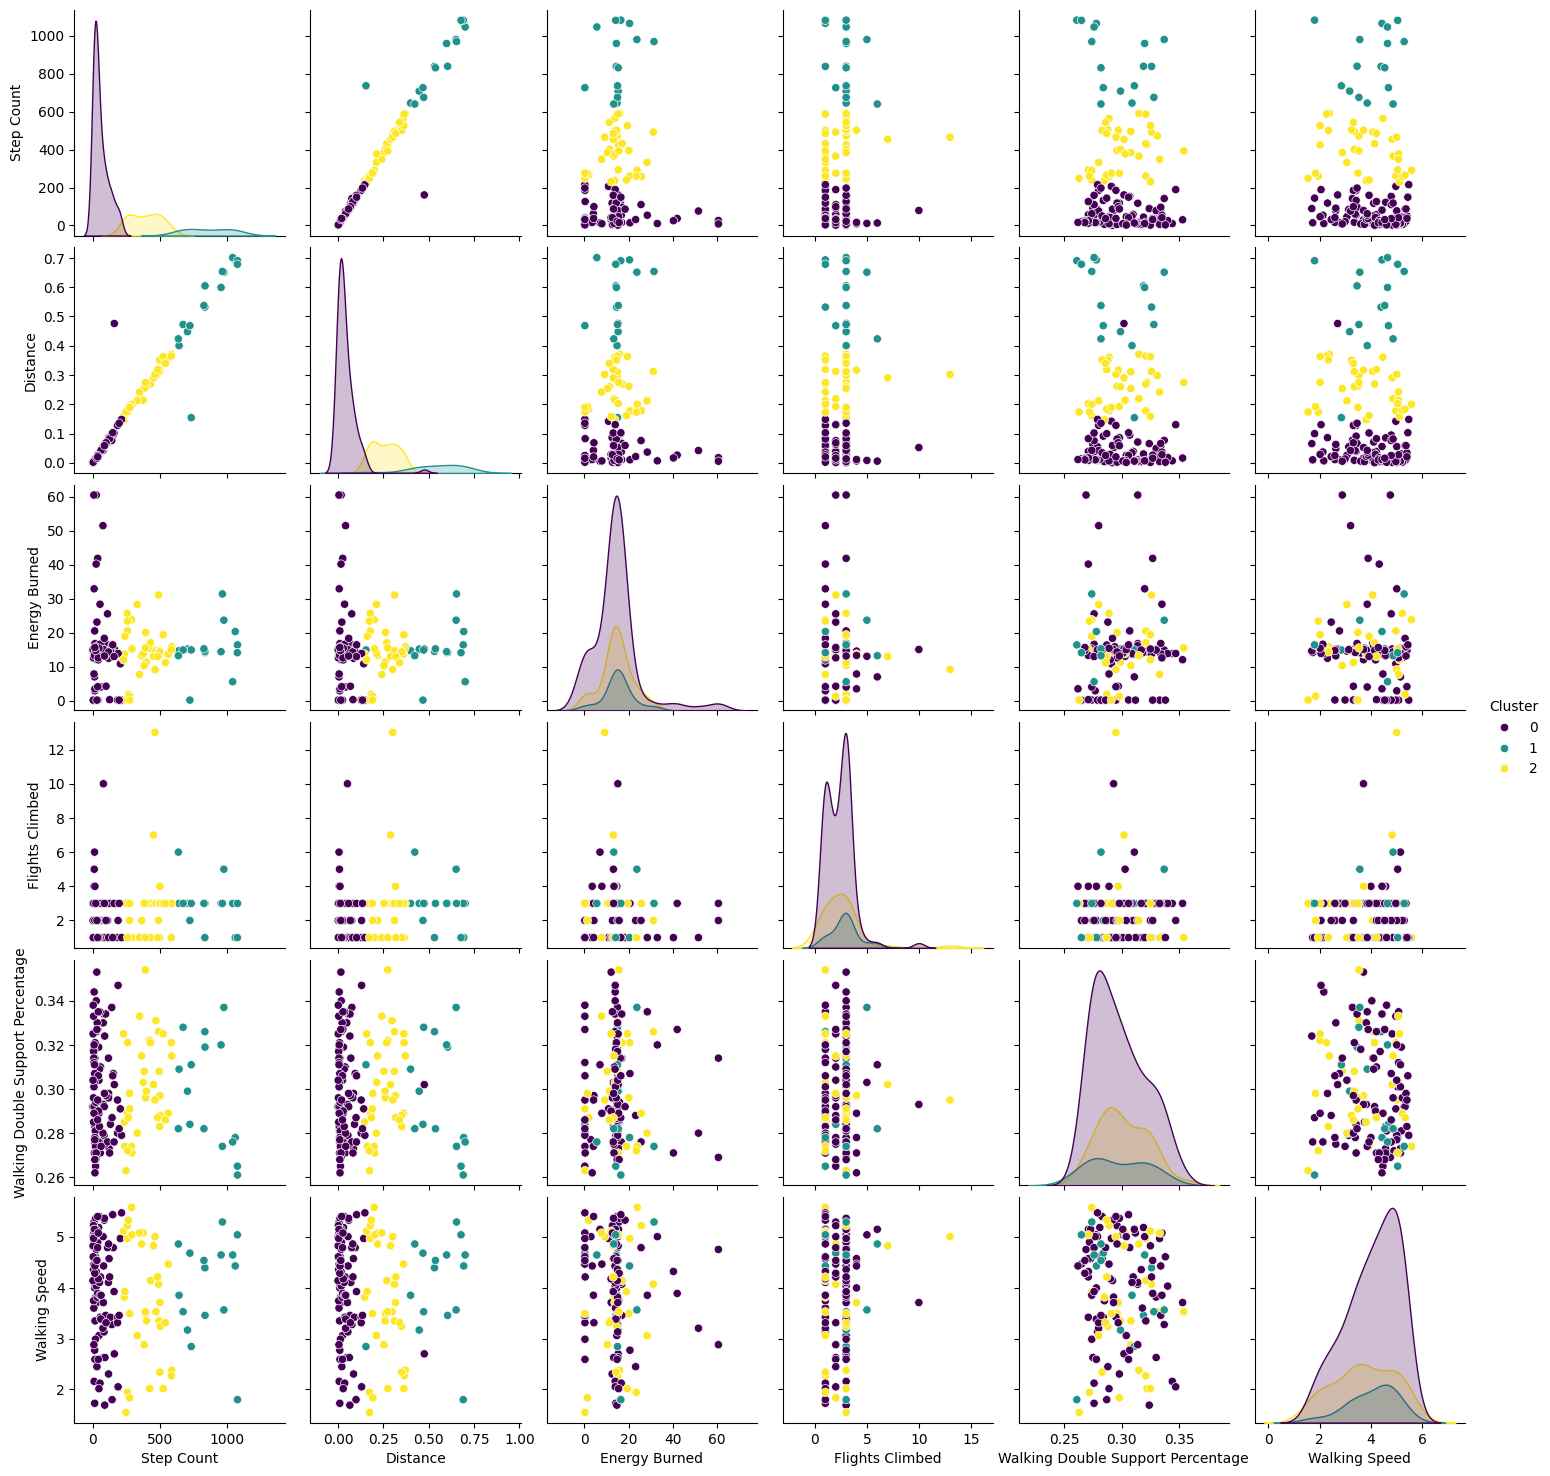

In [104]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df has columns Step Count, Distance, Energy Burned, Flights Climbed, Walking Double Support Percentage, Walking Speed

# Select features for clustering
X = df[['Step Count', 'Distance', 'Energy Burned', 'Flights Climbed', 'Walking Double Support Percentage', 'Walking Speed']]

# Initialize K-means model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit K-means model
kmeans.fit(X)

# Get cluster labels
df['Cluster'] = kmeans.labels_

# Plot clusters using pairplot
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()


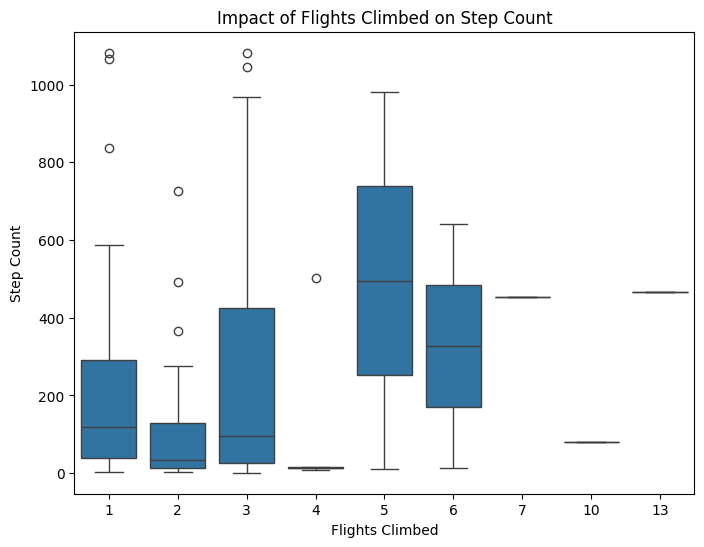

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df has columns Flights Climbed, Step Count, Distance, Energy Burned

# Compare impact of Flights Climbed on Step Count
plt.figure(figsize=(8, 6))
sns.boxplot(x='Flights Climbed', y='Step Count', data=df)
plt.title('Impact of Flights Climbed on Step Count')
plt.xlabel('Flights Climbed')
plt.ylabel('Step Count')
plt.show()
